**Dataset-1:** This part of the lab will use a linearly separable dataset. 

**Step-1: Import Libraries:** The first step in any project is to import the libraries we are going to use.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()
from ipywidgets import interact, fixed
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
import pandas as pd

**Step-2: Load the Data:** The next step is to load the data. In this part, we will generate some data points and use them as our dataset. We will use the make_blobs function: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

In [ ]:
data = pd.read_csv('Dataset.csv')
data = data.to_numpy()
print('Dimensions: ', data.shape)
print(data)
#data_train = data.loc[0:210,['X_train', 'y_train']]


Dimensions:  (211, 6)
[[-0.15899   0.42398   1.        0.       -0.35306  -0.6739  ]
 [-0.34793   0.47076   1.        1.       -0.22713   0.44732 ]
 [-0.50461   0.3538    1.        0.        0.092898 -0.75352 ]
 ...
 [-0.31694  -0.22895   1.             nan       nan       nan]
 [-0.29412  -0.13479   0.             nan       nan       nan]
 [-0.15311   0.1845    0.             nan       nan       nan]]


In [ ]:
X_train = data[:,:2]
y_train = data[:,2]
X_test = data[:200,4:6]
y_test = data[:200,3]

print("X_train: \n", X_train)
print("y_train: \n", y_train)
print("X_test: \n", X_test)
print("y_test: \n", y_test)

X_train: 
 [[-1.5899e-01  4.2398e-01]
 [-3.4793e-01  4.7076e-01]
 [-5.0461e-01  3.5380e-01]
 [-5.9677e-01  1.1403e-01]
 [-5.1843e-01 -1.7252e-01]
 [-2.9263e-01 -2.0760e-01]
 [-1.5899e-01 -4.3860e-02]
 [-5.7604e-02  1.4328e-01]
 [-7.1429e-02  2.7193e-01]
 [-2.9724e-01  3.4795e-01]
 [-4.1705e-01  2.0175e-01]
 [-4.4009e-01  8.7719e-03]
 [-3.2488e-01 -3.2164e-02]
 [-2.4654e-01  5.5556e-02]
 [-2.1889e-01  2.0175e-01]
 [-3.4332e-01  1.6082e-01]
 [-5.0922e-01  7.8947e-02]
 [-3.8479e-01 -9.0643e-02]
 [-1.4977e-01  1.2573e-01]
 [-1.9585e-01  3.2456e-01]
 [-3.9170e-02 -2.1930e-01]
 [-1.0830e-01 -3.0117e-01]
 [-1.8664e-01 -3.3041e-01]
 [-2.1889e-01 -4.2398e-01]
 [-8.0645e-02 -5.6433e-01]
 [ 6.6820e-02 -5.1754e-01]
 [ 9.4470e-02 -3.2456e-01]
 [ 1.8664e-01 -1.6667e-01]
 [ 6.2212e-02 -7.3099e-02]
 [ 2.0737e-02 -1.9591e-01]
 [ 2.9954e-02 -3.4210e-01]
 [-9.9078e-02 -3.7719e-01]
 [-6.9124e-03 -4.6491e-01]
 [ 1.3134e-01 -4.2983e-01]
 [ 2.3272e-01 -1.9591e-01]
 [ 8.5253e-02 -8.4795e-02]
 [-1.3134e-01 -2.

In [ ]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data[:,2] == 0
    pos = data[:,2] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

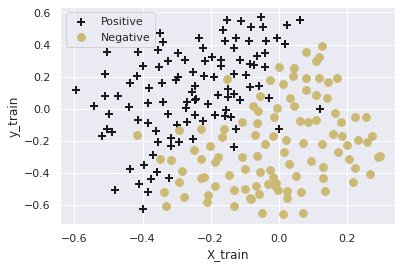

In [ ]:
plotData(data[:,:3], 'X_train', 'y_train', 'Positive', 'Negative')

I think you could use a linear SVC to classify this data. You can see there is a vague line that seperates the positive and negative points above. The linear SVC will probably do a good job at classifing, but it will not be perfect. As you can see, there are some overlap in the data points.

**Step-3: Train SVC Model:** This is linrealy separable data. We do not need to use a polynomial or RBF kernel. 

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
#model = SVC(kernel='linear', C=1E10)
#model.fit(X, y)
model = SVC()
cv = RepeatedKFold(n_splits=5,n_repeats=3,random_state=1)
cv.get_n_splits(X_train, y_train)

tuned_parameters = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
    {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
]

search = RandomizedSearchCV(model, tuned_parameters, n_iter=16, scoring='accuracy', cv=cv, random_state=1)
result = search.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 12 is smaller than n_iter=16. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [ ]:
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9225913621262459
Best Hyperparameters: {'kernel': 'linear', 'C': 10}


The optimal kernal function is linear which looks right for our graph above and what I answered earlier. The optimal C value is 10 becuase since the accuracy is 92.26% you want to keep the C value lower.

Retrain model using hyper-parameters and train data

In [ ]:
model = SVC(kernel='linear', C=10)
model.fit(X_train, y_train)

SVC(C=10, kernel='linear')

To have a better visualization, let's plot the data, the support vectors, and see the classifier line. We will implement a function for that purpose. 

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca() #create a new axis if there is no axis in the fig. 
    xlim = ax.get_xlim() #if there is an axis, get the x-axis limit
    ylim = ax.get_ylim() #if there is an axis, get the x-axis limit
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape) #Evaluate the decision function for the samples in xy.
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Now, let's call this function.

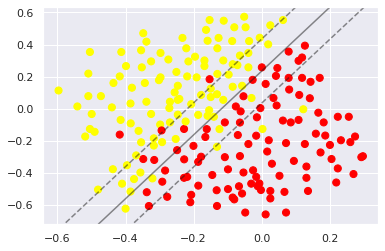

In [ ]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn')
plot_svc_decision_function(model)

**Step-4: Test SVC Model:**

If you want to test the model, use model.predict

In [ ]:
y_pred = model.predict(X_test)
print(y_pred)

[0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0.
 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0.
 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0.
 1. 1. 1. 0. 0. 0. 0. 0.]


Now, let's manually vary C and see what happens

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94       113
         1.0       0.95      0.90      0.92        87

    accuracy                           0.94       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.94      0.94      0.93       200



The model seemed to do very well. The accuracy is 94% which is higher than I expected. The precision scores are 92% and 95% for the 0 and 1 classes respectively. The model seems to be able to identify the negative and positive data very well. The recall scores were also impressive with the 0 class having a score of 96% and the 1 class with a 90%. The f1-score had a macro and weighted average of 93% which is also very good. Overal, the model preformed excellently for the data provided.